In [ ]:
import os
import cv2
import tensorflow as tf
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline
from matplotlib import pyplot as plt
from datetime import datetime

In [8]:
tf.test.is_gpu_available()

True

In [ ]:
thic_wsi_path = '/srv/tank/mcw/test_wsi.tif'

In [ ]:
img = cv2.imread(thic_wsi_path)

In [ ]:
img == None

In [ ]:
small_tile = '/srv/tank/mcw/Prostates/145_11/tile_x015_y033.tiff'

In [ ]:
img_small = cv2.imread(small_tile)

In [ ]:
plt.imshow(img_small)

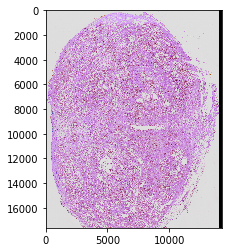

In [7]:
wsi_path = '/srv/tank/mcw/wsi/145_11.tiff'
ws_img = cv2.imread(wsi_path)
plt.imshow(ws_img)

In [3]:
ws_img.shape

(17625, 14250, 3)

In [23]:
ws_img_pixels = ws_img.reshape((ws_img.shape[0]*ws_img.shape[1]),3)

In [24]:
ws_img_pixels.shape

(251156250, 3)

In [25]:
ws_img_pixels.dtype

dtype('uint8')

In [41]:
my_graph = tf.Graph()
sess = tf.Session(graph=my_graph)
with my_graph.as_default():
    X_init = tf.placeholder(tf.uint8, shape=ws_img_pixels.shape)
    X = tf.Variable(X_init)
    sess.run(tf.global_variables_initializer(), feed_dict={X_init: ws_img_pixels})
    def input_fn2():
        return tf.train.limit_epochs(
          X_init, num_epochs=1)
    kmeans = tf.contrib.factorization.KMeansClustering(
    num_clusters=2, use_mini_batch=False)
    kmeans.train(input_fn2)
# with my_graph.as_default():
#     output_y = sess.run(your_graph_output, feed_dict={other_placeholder: other_data})

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpog6r5d7b', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5fc448ec50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


ValueError: Tensor("sub:0", shape=(), dtype=int32) must be from the same graph as Tensor("strided_slice:0", shape=(), dtype=int32).